In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def f(x):
    return 3 * x**2 - 4 * x + 5


f(3.0)

20.0

In [44]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [45]:
np.arange(-5, 5, 20), np.linspace(-5, 5, 20)

(array([-5]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

In [46]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

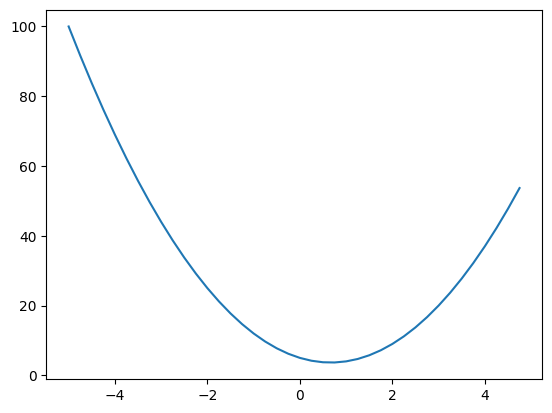

In [47]:
plt.plot(xs, ys)

In [48]:
h = 0.00000000000001
x = 3

print(
    f"f(x + h): {f(x + h)}, \nf(x): {f(x)},\nf(x + h)-f(x): {f(x + h)-f(x)}, \nslope:(f(x + h)-f(x))/h: {(f(x + h)-f(x))/h}"
)

f(x + h): 20.000000000000142, 
f(x): 20,
f(x + h)-f(x): 1.4210854715202004e-13, 
slope:(f(x + h)-f(x))/h: 14.210854715202004


In [49]:
# derivateive of f(x): 6x-4
6 * (3) - 4

14

In [50]:
h = 0.00000000000001
x = -3

print(
    f"f(x + h): {f(x + h)}, \nf(x): {f(x)},\nf(x + h)-f(x): {f(x + h)-f(x)}, \nslope:(f(x + h)-f(x))/h: {(f(x + h)-f(x))/h}"
)

f(x + h): 43.99999999999978, 
f(x): 44,
f(x + h)-f(x): -2.2026824808563106e-13, 
slope:(f(x + h)-f(x))/h: -22.026824808563106


In [51]:
# derivateive of f(x): 6x-4
6 * (-3) - 4

-22

In [52]:
# lets get more complex

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [53]:
# computing derivative for a
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a * b + c
print(f"d1: {d1}")

# so for derivative w.r.t a
# so we only bumped a
a += h
d2 = a * b + c
print(f"d2: {d2}")


print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 3.999699999999999
slope: -3.000000000010772


In [54]:
#  for b

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a * b + c
print(f"d1: {d1}")

# so for derivative w.r.t a
# so we only bumped a
b += h
d2 = a * b + c
print(f"d2: {d2}")


print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 4.0002
slope: 2.0000000000042206


In [55]:
#  for c

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a * b + c
print(f"d1: {d1}")

# so for derivative w.r.t a
# so we only bumped a
c += h
d2 = a * b + c
print(f"d2: {d2}")


print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


In [56]:
# visualize graph

from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format="svg", rankdir="LR"):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ["LR", "TB"]
    nodes, edges = trace(root)
    dot = Digraph(
        format=format, graph_attr={"rankdir": rankdir}
    )  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(
            name=str(id(n)),
            label="{ %s| data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
            # label="{ %s| data %.4f  }" % (n.label, n.data),
            shape="record",
        )
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [57]:
#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out


Value(10)

Value(data=10)

In [58]:
a, b, c = Value(2.0), Value(-3.0), Value(10.0)
a * b + c

Value(data=4.0)

In [59]:
a + b  # a.__add__(b

Value(data=-1.0)

In [60]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")
        return out


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

In [61]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [62]:
d._op

'+'

-8.0


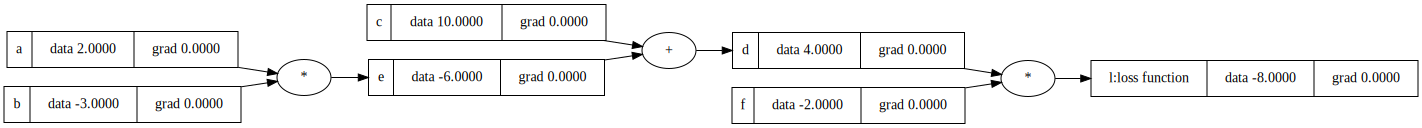

In [63]:
a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
e = a * b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label="f")
L = d * f
L.label = "l:loss function"

print(L.data)
draw_dot(L)

# loss function actually works with weights, not values

# so we'll be calcualting derivative of L with each node. so we might add g in __init__ as it would be for each node

In [64]:
# grad value for each node is `change in Loss w.r.t change in that node`:  dL/d(that node)

so

1. dL/dL will be 1
2.


In [65]:
# 1. dL/dL


def lol():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    # dL/dL
    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L2 = L.data + h

    print((L2 - L1) / h)


lol()


# so for Nodel L~ dL/dL ~ L.grad=  1

L.grad = 1.0

0.9999999999976694


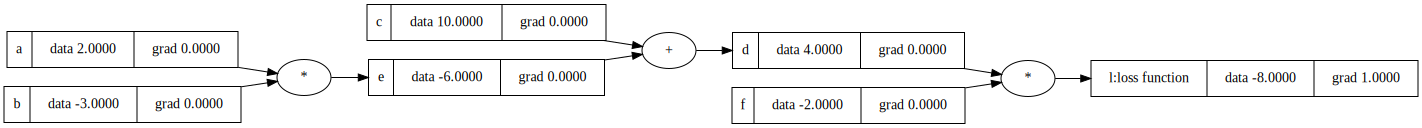

In [66]:
draw_dot(L)

In [67]:
# 1. dL/dd

"""
L=d*f
dL/dd =?

as we are changing d, so x = d and x+h would be d+h

as fomrula of derivative goes
(f(x+h) - f(x))/h
putting values as L is d*f

((d+h)*f - (d*f))/h
(d*f + h*f - d*f)/h
(h*f)/h
f

"""


#########################3 just for confirmation


def dlbydd():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"

    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    d = Value(d.data + h, label="f")

    L = d * f
    L.label = "l:loss function"
    L2 = L.data
    # print(L2 - L1)

    print((L2 - L1) / h)


dlbydd()


#########################3 just for confirmation


def dlbydf():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"

    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    f = Value(f.data + h, label="f")

    L = d * f
    L.label = "l:loss function"
    L2 = L.data
    # print(L2 - L1)

    print((L2 - L1) / h)


dlbydf()

f.grad = 3.9999999

d.grad = -1.9999999

-1.9999999999953388
3.9999999999995595


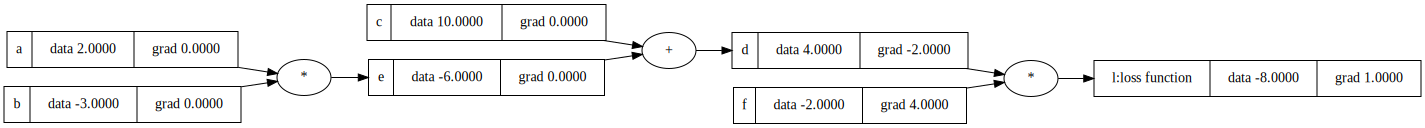

In [68]:
draw_dot(L)

In [69]:
# c.grad

# chain rule dL/dc = dL / dd * dd / dc


# so for dd/dc
"""
d = e + c


(f(x + h) - f(x)) / h


((e + c + h) - (e + c)) / h

so, dd/dc = 1


so for chain rule,

dL/dc = dL / dd * dd / dc


"""

c.grad = -2
e.grad = -2

In [70]:
# 1. dL/da


# alternative
def lol():

    h = 0.0001

    a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L1 = L.data

    # dL/dL
    e = Value(e.data + h, label="e")
    # e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "l:loss function"
    L2 = L.data

    print((L2 - L1) / h)


lol()


a.grad = 6.000000000021544
b.grad = -4.000000000008441

-1.9999999999953388


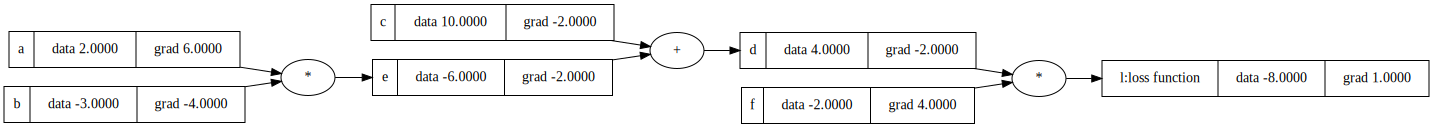

In [71]:
draw_dot(L)

## optimization step


-7.286496003715976


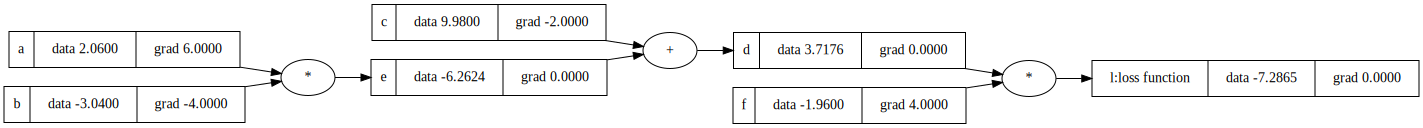

In [72]:
# optimization step
# Let L go up


a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad


# forward pass

e = a * b
e.label = "e"
d = e + c
d.label = "d"
L = d * f
L.label = "l:loss function"
print(L.data)
draw_dot(L)

# backpropagate through neuron


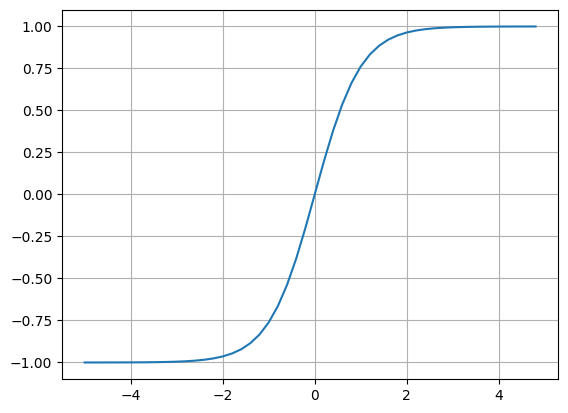

In [73]:
# activation function is usually squashing function
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [74]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"

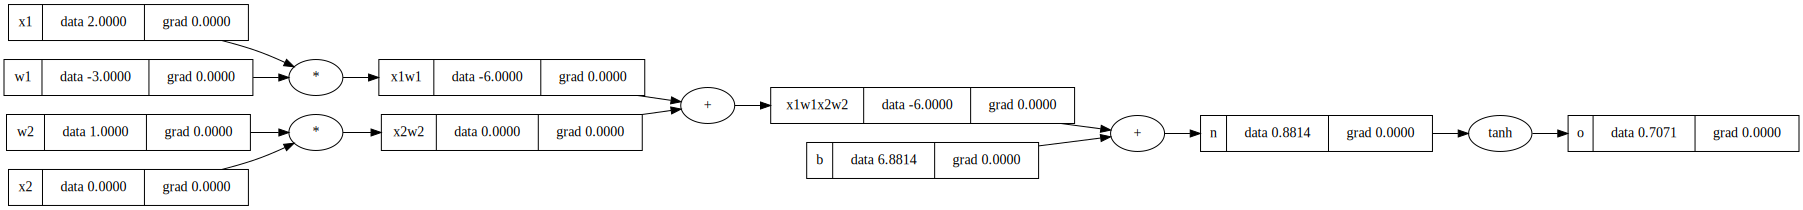

In [75]:
draw_dot(o)

In [76]:
# lets do backpropagation

o.grad = 1.0

In [77]:
o.data

0.707106777676776

In [78]:
# backpropagate through tanh

#  o =tanh(n)

# then what is

# do/dn = d(tanh(n))/dn    = 1-(tanh(n))^2

# so its just: 1- o**2


1 - o.data**2

# so do/dn =

n.grad = 0.50000


# as + is just a distribuot of gradients
# + mean both exps have positive effect on ouput

x1w1x2w2.grad = 0.50000

b.grad = 0.50000

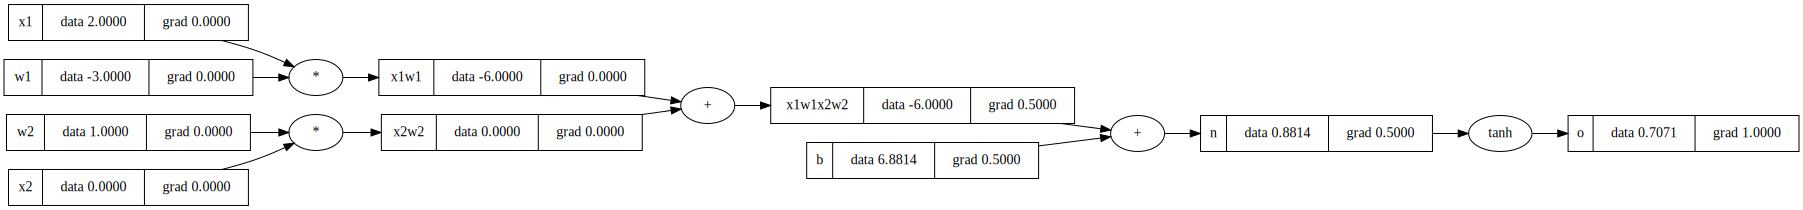

In [79]:
draw_dot(o)

In [80]:
#  as its again +, so

# + mean both exps have positive effect on ouput

x1w1.grad = 0.50000
x2w2.grad = 0.50000


#  for x2

x2.grad = w2.data * x2w2.grad  # x2w2.grad is chain of gradients from o

w2.grad = (
    x2.data * x2w2.grad
)  # 0 because x2 is 0   # because weight works accoring to input


#  for x1

x1.grad = w1.data * x1w1.grad  # x1w1.grad is chain of gradients from o

w1.grad = x1.data * x1w1.grad

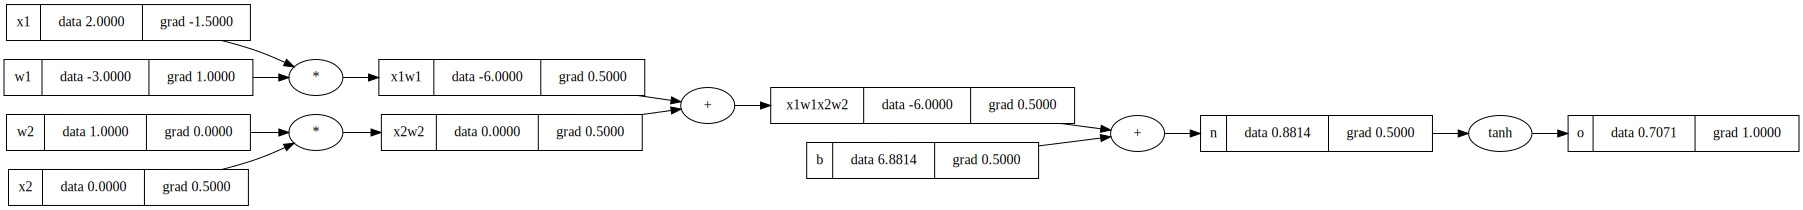

In [81]:
draw_dot(o)

## Add backward functionality in Value


In [82]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad = 1.0 * out.grad  # 1.0 for addition
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad  # 1.0 for addition
            other.grad = self.data * out.grad

        out._backward = _backwar    d

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

SyntaxError: invalid syntax (628730657.py, line 39)

In [83]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"


# backward
o.grad = 1.0
o._backward()

AttributeError: 'Value' object has no attribute '_backward'

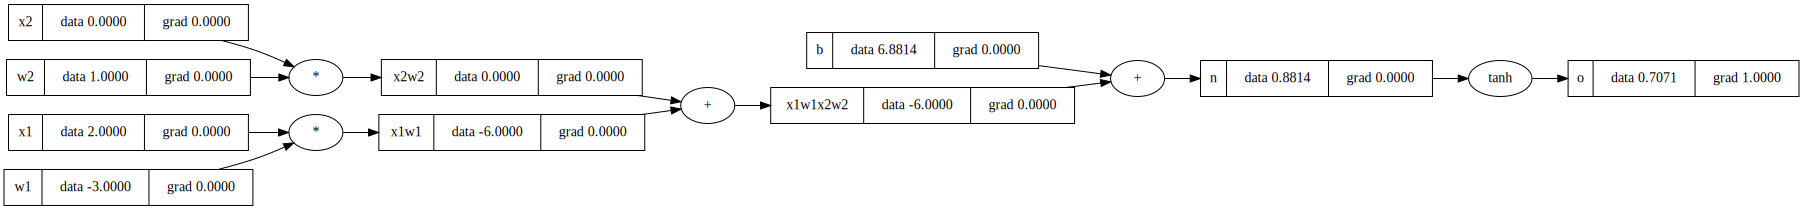

In [ ]:
draw_dot(o)

In [ ]:
# backward
n._backward()
draw_dot(o)

AttributeError: 'Value' object has no attribute '_backward'

In [ ]:
# backward
b._backward()
draw_dot(o)

AttributeError: 'Value' object has no attribute '_backward'

In [ ]:
x1w1x2w2._backward()
draw_dot(o)

AttributeError: 'Value' object has no attribute '_backward'

In [84]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

AttributeError: 'Value' object has no attribute '_backward'

## before calling backward we need to make sure that all other dependencies are already filled.

### so we can achieve this ordering of graph using topological sort. It make sures all edges go to one way from left->right


In [85]:
topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)

        topo.append(v)


build_topo(o)
topo

[Value(data=6.88137358),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.88137358),
 Value(data=0.707106777676776)]

#### so if wejust reset our gradients


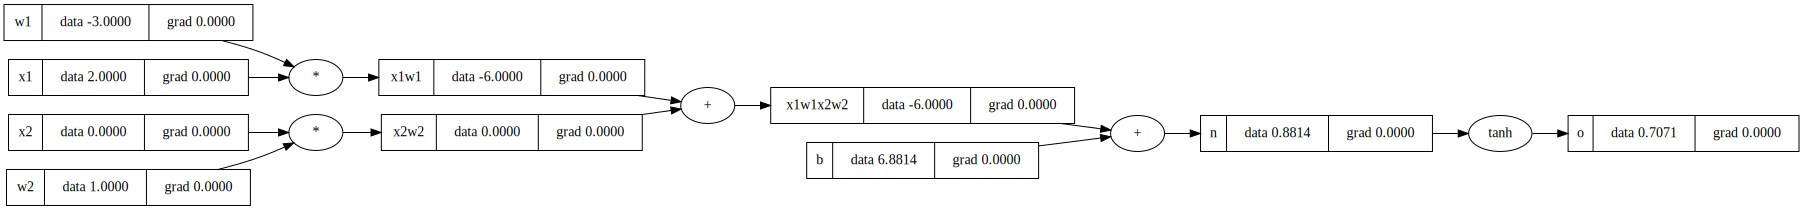

In [86]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"


draw_dot(o)

In [87]:
# backward
o.grad = 1.0


# topological ordering

topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)

        topo.append(v)


build_topo(o)  # o would be at last o list


#
for node in reversed(topo):
    node._backward()

draw_dot(o)

AttributeError: 'Value' object has no attribute '_backward'

## integrating backward() into Value


In [88]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad = 1.0 * out.grad  # 1.0 for addition
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad = other.data * out.grad  # 1.0 for addition
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

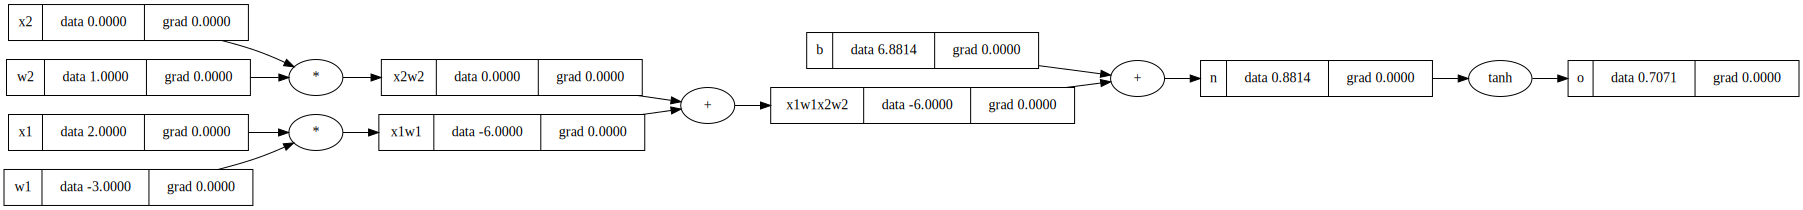

In [89]:
#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function
o = n.tanh()
o.label = "o"


draw_dot(o)

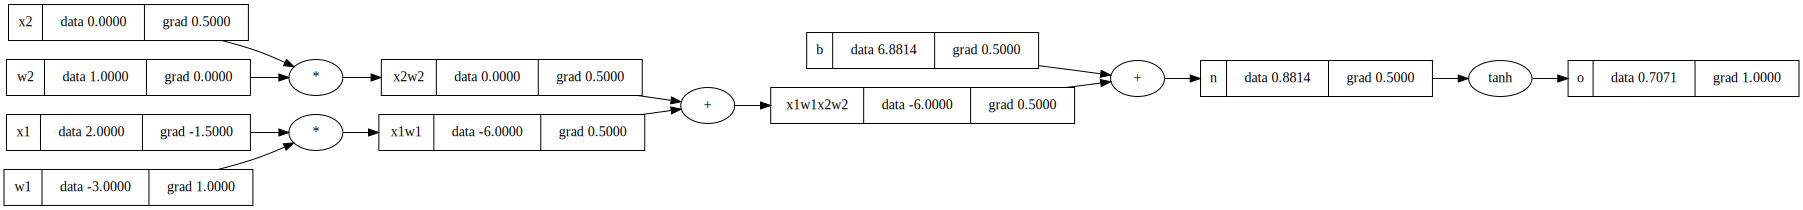

In [90]:
o.backward()

draw_dot(o)

## but there is a bug


gradient is not correct .. here grad w.r.t a should be 2.0 not 1.0 becasue in **add** functionality self and other are same object so they are overwritinng each other.


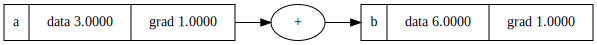

In [91]:
a = Value(3.0, label="a")
b = a + a
b.label = "b"

b.backward()

draw_dot(b)

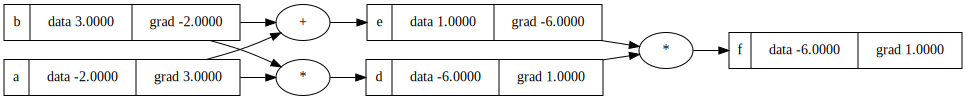

In [92]:
a = Value(-2.0, label="a")

b = Value(3.0, label="b")
d = a * b
d.label = "d"

e = a + b
e.label = "e"

f = d * e
f.label = "f"

f.backward()

draw_dot(f)

so whenever we aare using a variable more than once, issue is there like in case of d e


### so we need to accumulate thee gradients

def \_backward():
self.grad += 1.0 _ out.grad  
 other.grad += 1.0 _ out.grad


In [93]:
# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad += 1.0 * out.grad  # 1.0 for addition
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad  # 1.0 for addition
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.data

        out._backward = _backward
        return out

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


a, b, c = Value(2.0, label="a"), Value(-3.0, label="b"), Value(10.0, label="c")
d = a * b + c
d.label = "d"
d

Value(data=4.0)

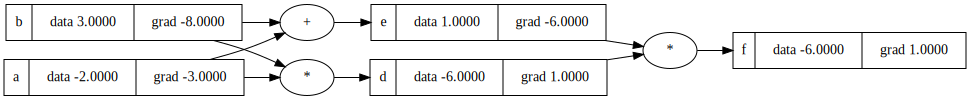

In [94]:
a = Value(-2.0, label="a")

b = Value(3.0, label="b")
d = a * b
d.label = "d"

e = a + b
e.label = "e"

f = d * e
f.label = "f"

f.backward()

draw_dot(f)

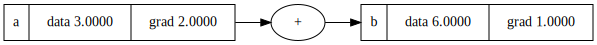

In [95]:
a = Value(3.0, label="a")
b = a + a
b.label = "b"

b.backward()

draw_dot(b)

## breaking tanh into more simpler equation


In [96]:
a = Value(2.0)
a + 1

AttributeError: 'int' object has no attribute 'data'

In [97]:
#  so to solve this we'll modify add


# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad += 1.0 * out.grad  # 1.0 for addition
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad  # 1.0 for addition
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [98]:
a = Value(2.0)
a + 1

Value(data=3.0)

In [99]:
1 + a

TypeError: unsupported operand type(s) for +: 'int' and 'Value'

In [100]:
a * 10, a.__mul__(10)  # a.__mul__(10)

(Value(data=20.0), Value(data=20.0))

In [101]:
10 * a

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [102]:
2.__mul__(a)

SyntaxError: invalid decimal literal (1126402431.py, line 1)

#### so wecan define rmul here


In [103]:
#  so to solve this we'll modify add


# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad += 1.0 * out.grad  # 1.0 for addition
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other  # Call regular addition method for consistency

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad  # 1.0 for addition
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __rmul__(
        self, other
    ):  # other*self   # this will check if 2*a can not happen, so can a*2 happen?
        # print("rmul")
        return self * other  # changing order and redirecting to __mul__

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward
        return out

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):

            node._backward()

In [104]:
a = Value(2.0)

2 * a, a * 2

(Value(data=4.0), Value(data=4.0))

In [105]:
2 + a, a + 2

(Value(data=4.0), Value(data=4.0))

#### let's implement division


In [106]:
a = Value(1.0)
b = Value(1.0)

a / b

TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

### a / b is same as a*(1/b) ~~ a*(b\*\*-1) # **truediv**()

#so we want to first implement a\*\*k for k = constant


In [107]:
#  so to solve this we'll modify add


# self._prev:  but how are we going to show connectiveness of these numbers as we want to keep expression graphs. to keep track of what values produce other values
# _op='': to track which operation on children created new node


#  building Value Object: data structure to mantain these numerical expressions
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self._backward = (
            lambda: None
        )  # for chain rule but by default it doesnot do anything  # a case for leaf node
        self.label = label
        self.grad = 0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(
            self.data + other.data, (self, other), "+"
        )  # here (self, other) are _children

        def _backward():
            self.grad += 1.0 * out.grad  # 1.0 for addition
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other  # Call regular addition method for consistency

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad  # 1.0 for addition
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __rmul__(
        self, other
    ):  # other*self   # this will check if 2*a can not happen, so can a*2 happen?
        # print("rmul")
        return self * other  # changing order and redirecting to __mul__

    def __pow__(self, other):
        assert isinstance(
            other, (int, float)
        ), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f"**{other}")

        def _backward():
            self.grad = other * self.data ** (other - 1) * out.grad  # n(x)^(n-1)

        out._backward = _backward

        return out

    def __truediv__(self, other):
        # print(f"self:{self},other:{other}, self * (other ** (-1): {(other * (-1))}")

        return self * (other ** (-1))

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)  # tanh
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward
        return out

    def __neg__(self):  # -self
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def backward(self):

        # topological ordering

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)

                topo.append(v)

        build_topo(self)  # o would be at last o list

        self.grad = 1.0
        for node in reversed(topo):

            node._backward()

In [108]:
a = Value(1.0)
b = Value(3.0)

a * 3.0

Value(data=3.0)

In [109]:
a - b

Value(data=-2.0)

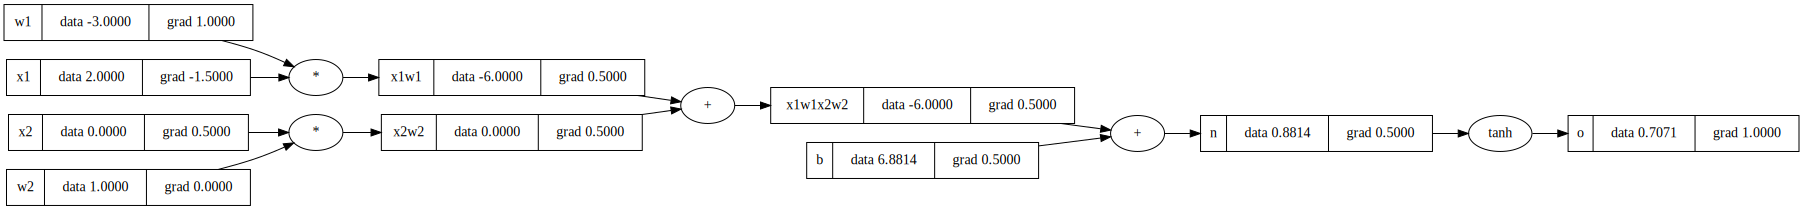

In [110]:
# now lets break tanh

import math

#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function

# activation function
o = n.tanh()
o.label = "o"
o.backward()

draw_dot(o)

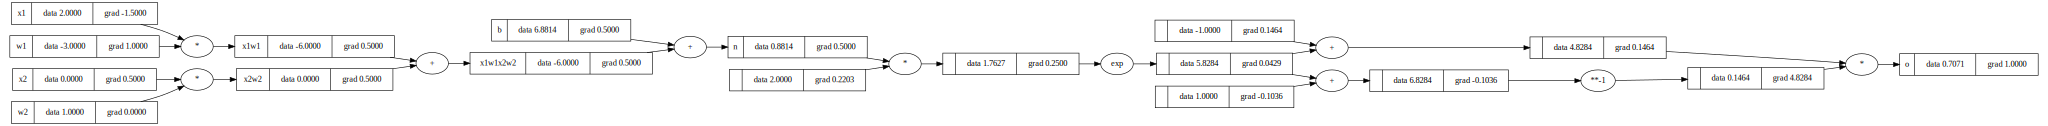

In [111]:
# now lets break tanh

import math

#  a neuron with two inputs: x1,x2

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")
# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")
b = Value(6.88137358, label="b")

x1w1 = x1 * w1
x1w1.label = "x1w1"

x2w2 = x2 * w2
x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1x2w2"
# adding bias
n = x1w1x2w2 + b
n.label = "n"
# activation function

# -----------------------
# o = n.tanh()
e = (2 * n).exp()

o = (e - 1) / (e + 1)
# v-----------------------
o.label = "o"
o.backward()

draw_dot(o)

# TOrch


In [112]:
import torch

# python deault-ly works in 64 bit precision
x1 = torch.tensor([2.0]).double()
x1.requires_grad = True  # because these are leaf nodes so i have to specify personally
x2 = torch.tensor([0.0]).double()
x2.requires_grad = True

w1 = torch.tensor([-3.0]).double()
w1.requires_grad = True

w2 = torch.tensor([1.0]).double()
w2.requires_grad = True

b = torch.tensor([6.8817]).double()
b.requires_grad = True

n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)


print(o.data.item())
o.backward()


print("----")
print("x1:", x1.grad.item())
print("w1:", w1.grad.item())
print("x2:", x2.grad.item())
print("w2:", w2.grad.item())

0.7072699694561513
----
x1: -1.4993075709164845
w1: 0.9995383806109897
x2: 0.4997691903054948
w2: 0.0


In [113]:
import torch

# Define tensors with requires_grad=True
x1 = torch.tensor(2.0, requires_grad=True, dtype=torch.float64)
x2 = torch.tensor(0.0, requires_grad=True, dtype=torch.float64)

w1 = torch.tensor(-3.0, requires_grad=True, dtype=torch.float64)
w2 = torch.tensor(1.0, requires_grad=True, dtype=torch.float64)

b = torch.tensor(6.8817, requires_grad=True, dtype=torch.float64)

# Compute the output
n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

# Print the output value
print(o.item())

# Perform backpropagation
o.backward()

# Print gradients
print("----")
print("x1:", x1.grad.item())
print("w1:", w1.grad.item())
print("x2:", x2.grad.item())
print("w2:", w2.grad.item())
print("b:", b.grad.item())

0.7072699500101757
----
x1: -1.4993076534378107
w1: 0.9995384356252072
x2: 0.4997692178126036
w2: 0.0
b: 0.4997692178126036


In [114]:
o.data

tensor(0.7073, dtype=torch.float64)

In [115]:
o.data.item(), o.item()

(0.7072699500101757, 0.7072699500101757)

In [116]:
x2.grad

tensor(0.4998, dtype=torch.float64)

# NN


In [117]:
import random


class Neuron:
    def __init__(self, nin):  # nin: number of inputs coming to neuron
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        # print(self.w)
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b
        # or
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)

        out = act.tanh()
        return out


x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.788409826302581)

## Layer


In [118]:
class Layer:

    def __init__(
        self, nin, nout
    ):  # nout: # of neurons in layer  # nin is input dimensionality of neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs


x = [2.0, 3.0]
n = Layer(2, 3)  # three  2 dimensional neurons
n(x)

[Value(data=0.9269760697141178),
 Value(data=-0.6029062755809116),
 Value(data=0.985341306141342)]

In [119]:
class MLP:
    def __init__(self, nin, nouts):
        # nouts: list of outputs/neurons## sizes of layer we want in our MLP
        sz = [nin] + nouts

        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        # print(self.layers)

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


x = [2.0, 3.0, -1]  # 3-dim input
n = MLP(nin=3, nouts=[4, 4, 1])  # three  2 dimensional neurons
n(x)

Value(data=0.9805610219179336)

In [120]:
np.array([1]) + [2]

array([3])

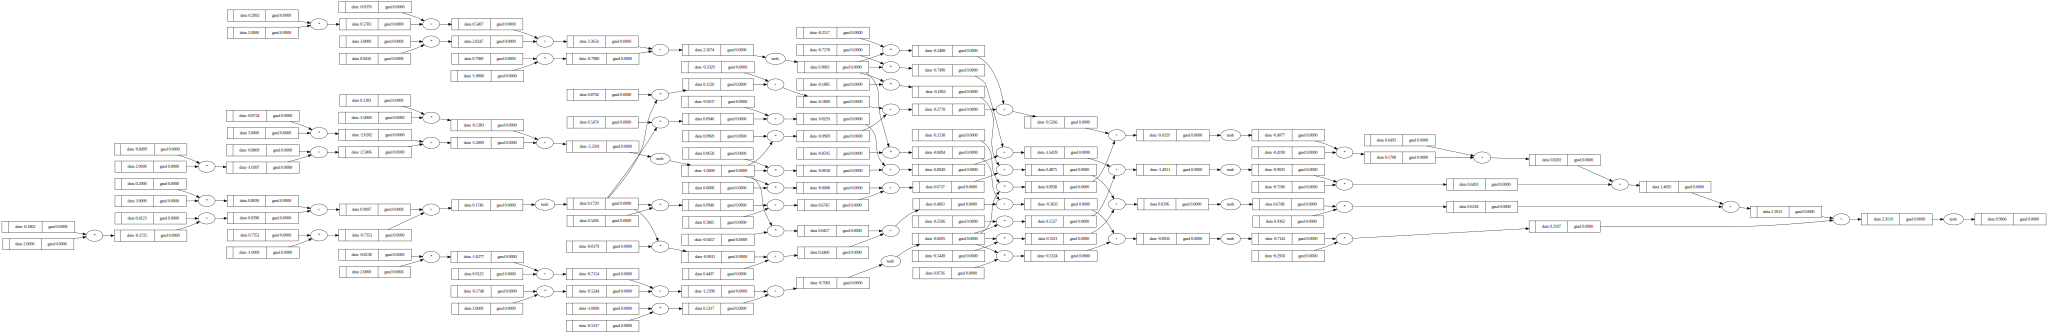

In [121]:
draw_dot(n(x))

In [122]:
#  example

# binary classifier
# inputs
xs = [[2.0, 3.0, -1.0], [3.0, -1, 0, 0.5], [0.5, 1.0, 1.0], [1.0, 1.0, -1.0]]
xs


# desired targets

ys = [1.0, 1.0, -1.0, -1.0]

In [123]:
# lets inference
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9805610219179336),
 Value(data=0.9704568382809258),
 Value(data=0.9664987451715182),
 Value(data=0.9177998535384823)]

In [124]:
#  loss
loss = sum([(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)])  # ygt- ground truth

loss

Value(data=7.546324265266614)

In [125]:
loss.backward()

In [126]:
n.layers[0].neurons[0].w[0].grad  # so increasing this neuron will decrease loss
# so we have such info against each neuron

0.11888521308648643

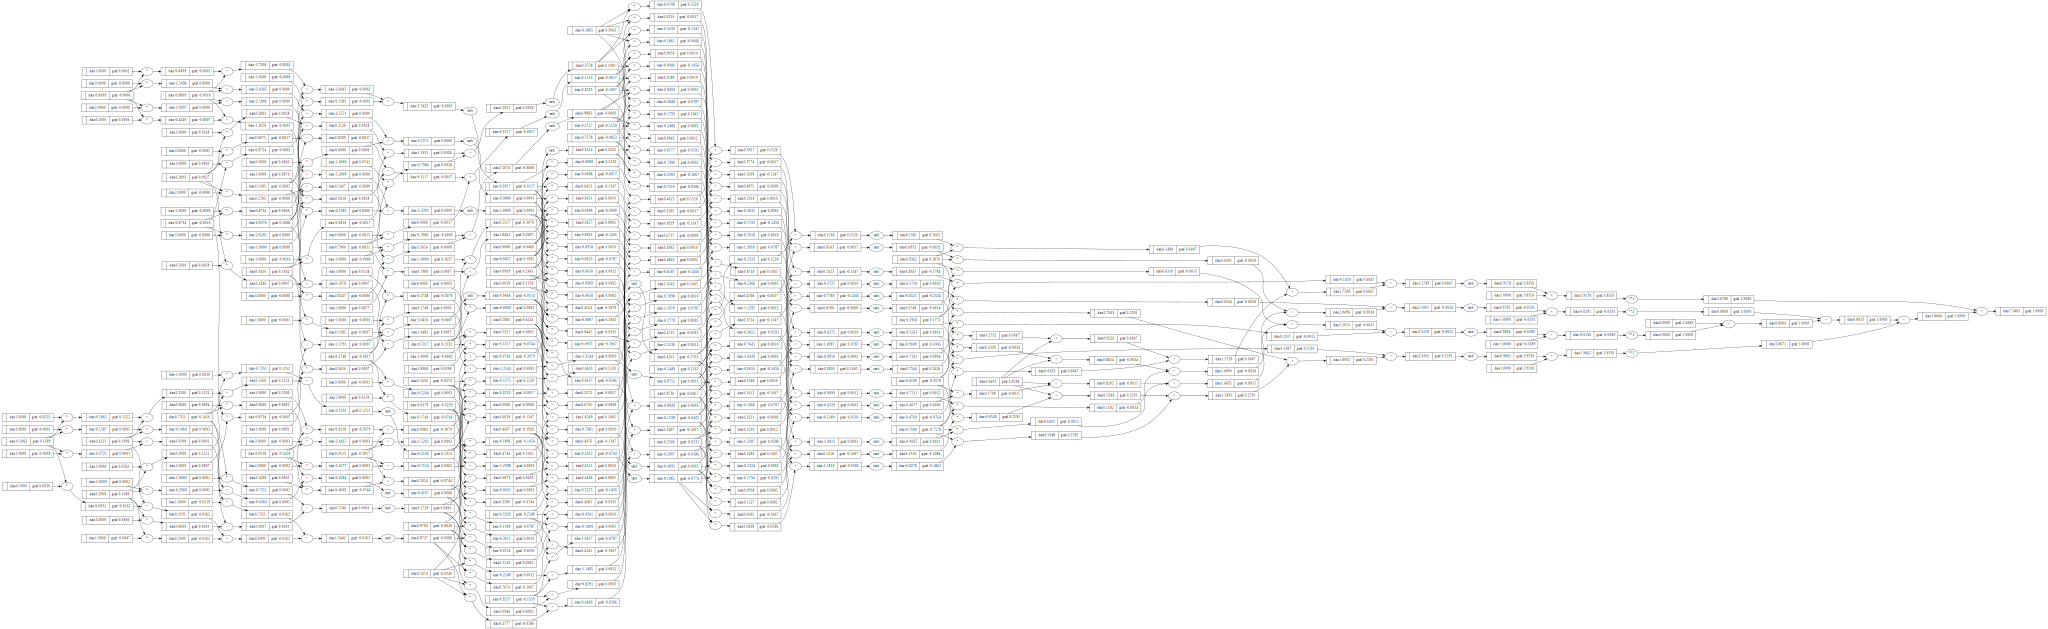

In [127]:
draw_dot(loss)

In [128]:
# but grads for input data are not useful because x can not be changed, we will change w,b


import random


class Neuron:
    def __init__(self, nin):  # nin: number of inputs coming to neuron
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        # print(self.w)
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b
        # or
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)

        out = act.tanh()
        return out

    def parameters(self):  # will retunr parameters agins t each neuron
        return self.w + [self.b]


class Layer:

    def __init__(
        self, nin, nout
    ):  # nout: # of neurons in layer  # nin is input dimensionality of neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params


class MLP:
    def __init__(self, nin, nouts):
        # nouts: list of outputs/neurons## sizes of layer we want in our MLP
        sz = [nin] + nouts

        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        # print(self.layers)

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [129]:
x = [2.0, 3.0, -1]  # 3-dim input
n = MLP(nin=3, nouts=[4, 4, 1])  # three  2 dimensional neurons
n(x)

Value(data=-0.002660032217580104)

In [130]:
len(n.parameters())

41

In [131]:
xs = [[2.0, 3.0, -1.0], [3.0, -1, 0, 0.5], [0.5, 1.0, 1.0], [1.0, 1.0, -1.0]]


# desired targets
ys = [1.0, 1.0, -1.0, -1.0]


# lets inference
ypred = [n(x) for x in xs]

#  loss
loss = sum([(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)])  # ygt- ground truth

loss

Value(data=7.429837191164074)

In [132]:
# after optimization

# lets inference
ypred = [n(x) for x in xs]
print(ypred)
#  loss
loss = sum([(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)])  # ygt- ground truth
loss  # loss is smaller than before

[Value(data=-0.002660032217580104), Value(data=-0.9265350279253142), Value(data=0.6326645129471288), Value(data=-0.78233184592725)]


Value(data=7.429837191164074)

In [133]:
for p in n.parameters():
    p.grad = 0.0
loss.backward()

In [134]:
n.layers[0].neurons[0].w[0].grad, n.layers[0].neurons[0].w[0].data

(-0.09623760757646359, 0.7956803203587781)

In [135]:
for p in n.parameters():
    # print(p)
    step_size = 0.1
    p.data += (
        -step_size * p.grad
    )  # this is data of b or w not x   # - to minize the loss

In [136]:
n.layers[0].neurons[0].w[0].grad, n.layers[0].neurons[0].w[0].data

(-0.09623760757646359, 0.8053040811164245)

In [137]:
n.parameters()

[Value(data=0.8053040811164245),
 Value(data=0.9760754181959905),
 Value(data=0.8366790100033603),
 Value(data=-0.4502761110171378),
 Value(data=0.7717267007108743),
 Value(data=-0.5702838866960462),
 Value(data=-0.007615942129069797),
 Value(data=0.037987398310503954),
 Value(data=0.19624906844283896),
 Value(data=-0.4650878858403139),
 Value(data=0.7590580937620913),
 Value(data=0.9351652730674229),
 Value(data=-0.34920724248078083),
 Value(data=1.0382110223009273),
 Value(data=0.6968046379133357),
 Value(data=-0.30064482761499967),
 Value(data=-0.23058808211245774),
 Value(data=-0.6766914247624056),
 Value(data=-1.0286715134511133),
 Value(data=0.6858481551021232),
 Value(data=-0.7562114106942227),
 Value(data=-0.37882360854762054),
 Value(data=0.35948307816989905),
 Value(data=0.006931868753761505),
 Value(data=-0.639164019412095),
 Value(data=0.8806350607053606),
 Value(data=-0.6856682253972417),
 Value(data=0.5663900908637811),
 Value(data=1.0296145752117591),
 Value(data=-0.7460

## Making it all respectable


In [138]:
# but grads for input data are not useful because x can not be changed, we will change w,b


import random


class Neuron:
    def __init__(self, nin):  # nin: number of inputs coming to neuron
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        # print(self.w)
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b
        # or
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)

        out = act.tanh()
        return out

    def parameters(self):  # will retunr parameters agins t each neuron
        return self.w + [self.b]


class Layer:

    def __init__(
        self, nin, nout
    ):  # nout: # of neurons in layer  # nin is input dimensionality of neurons
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params


class MLP:
    def __init__(self, nin, nouts):
        # nouts: list of outputs/neurons## sizes of layer we want in our MLP
        sz = [nin] + nouts

        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        # print(self.layers)

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [139]:
x = [2.0, 3.0, -1]  # 3-dim input
n = MLP(nin=3, nouts=[4, 4, 1])  # three  2 dimensional neurons
n(x)

Value(data=-0.7251285889025469)

In [140]:
xs = [[2.0, 3.0, -1.0], [3.0, -1, 0, 0.5], [0.5, 1.0, 1.0], [1.0, 1.0, -1.0]]


# desired targets
ys = [1.0, 1.0, -1.0, -1.0]
for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)])  # ygt- ground truth

    for p in n.parameters():
        p.grad = 0.0

    # backward pass
    loss.backward()

    for p in n.parameters():
        step_size = 0.05
        p.data += -step_size * p.grad

    print(f"epoch:{k}, current_loss={loss.data}")

epoch:0, current_loss=7.367151728841043
epoch:1, current_loss=4.849575574804151
epoch:2, current_loss=4.148800239372116
epoch:3, current_loss=3.8894104931182203
epoch:4, current_loss=3.7010139839521927
epoch:5, current_loss=3.514386844948901
epoch:6, current_loss=3.280542982149866
epoch:7, current_loss=2.9410281590924905
epoch:8, current_loss=2.526808036668415
epoch:9, current_loss=2.1378570493164304
epoch:10, current_loss=1.7801671996284751
epoch:11, current_loss=1.4677674200414883
epoch:12, current_loss=1.2061881036021744
epoch:13, current_loss=0.9895024935577043
epoch:14, current_loss=0.8159807251193643
epoch:15, current_loss=0.7027695462163394
epoch:16, current_loss=0.6903488147777541
epoch:17, current_loss=0.8390857955051708
epoch:18, current_loss=1.5834205423011418
epoch:19, current_loss=2.398170352358646


In [141]:
ypred

[Value(data=-0.49026961159359034),
 Value(data=0.5868120957409202),
 Value(data=-0.9437435666069288),
 Value(data=-0.9418810995009723)]